In [104]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import os, sys
import scipy.signal as sig

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools


In [118]:

freq = 1000 #Hz
resolution = 1000

def PWM_sim(PWM_val, freq = freq, resolution = resolution):
    TimePeriod = 1/freq
    t=np.linspace(0,TimePeriod,resolution); 
    pwm= t%TimePeriod<TimePeriod*PWM_val
    
    return t,pwm 


In [119]:
max_time = 1
frequency = 1
amp_fact = 0.1
offset_fact = 0.4
t = 0
timestamp = np.array([])
signal = np.array([])   

while (t < max_time ):
      PWM_value = amp_fact * np.sin(2 * np.pi *(frequency)* t) + offset_fact
      aux_t, aux_pwm = PWM_sim(PWM_value)
      timestamp = np.append(timestamp, aux_t+t)
      signal = np.append(signal, aux_pwm)
      t = t + 1/freq

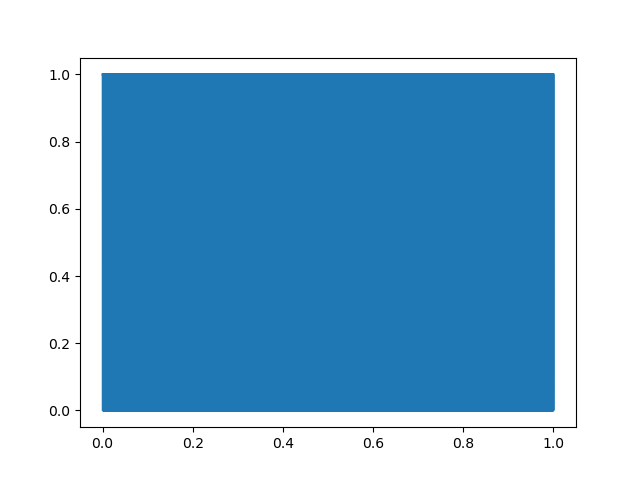

In [120]:
ax, fig = plt.subplots()
ax = plt.plot(timestamp, signal)

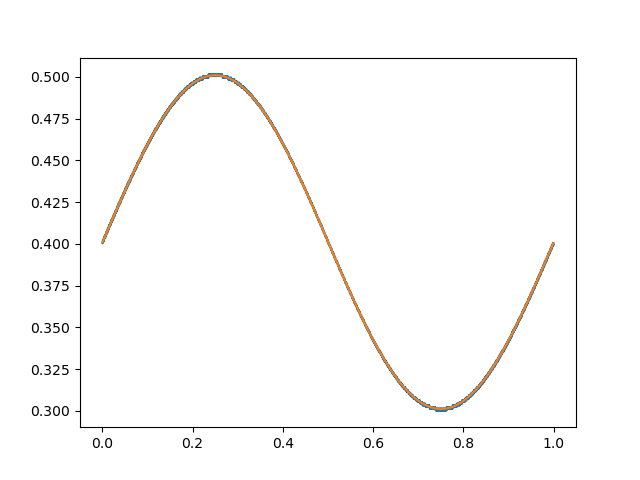

In [121]:
def moving_average(signal, window_size):
    cumsum = np.cumsum(signal, dtype=float)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

time_window = 1 # in milliseconds

window_size = int((time_window/1000)/(timestamp[1]-timestamp[0]))

filtered_signal = moving_average(signal,window_size)
filtered_timestamp = moving_average(timestamp,window_size)
popt, xfit, yfit = tools.sinus_fit(filtered_timestamp, filtered_signal, filtered_timestamp[0], filtered_timestamp[-1], len(filtered_timestamp), p0 = [ 0.1,  1,  0, 0.4])

ax, fig = plt.subplots()
ax = plt.plot(filtered_timestamp,filtered_signal)
ax = plt.plot(xfit,yfit)

In [122]:

def sample_signal(time, original_signal, period_detect):
    detections = np.arange(time[0]+period_detect, time[-1], period_detect)
    resampled_signal = []
    for i in detections:
        index_1 = np.argmin(np.abs(time-i-0.000032))
        index_2 = np.argmin(np.abs(time-i))
        resampled_signal.append(original_signal[index_2]-original_signal[index_1])

    return detections, resampled_signal

In [133]:
detections, resampled_signal = sample_signal(timestamp, signal, 1/1000)

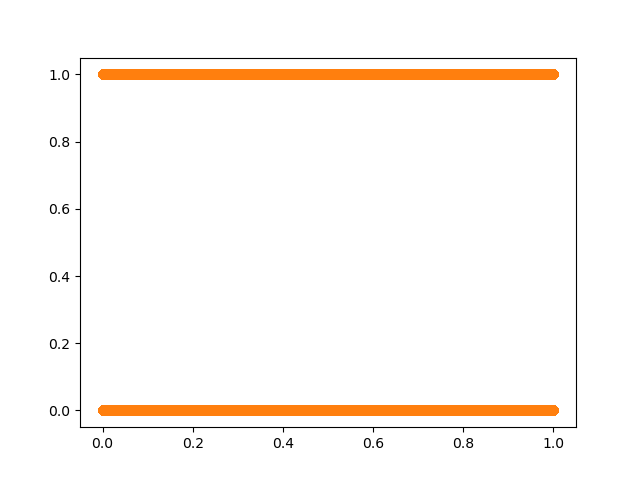

In [134]:
ax, fig = plt.subplots()
ax = plt.plot(detections,resampled_signal, '+-')
ax = plt.plot(timestamp, signal, 'o')